In [23]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [8]:
batting = pd.read_csv('batting.csv')
people = pd.read_csv('people.csv')
teams_states = pd.read_csv('teamID_states.csv')


In [9]:
batting = batting.apply(pd.to_numeric, errors='ignore')

batting['BA'] = round(batting.H / batting.AB,3)

max_ba1 = pd.DataFrame(np.arange(1871,2023))
max_ba1.columns=['yearID']
max_ba2 = batting.loc[batting['AB']>502].groupby('yearID').agg('max')[['BA']].reset_index()
max_ba = pd.merge(max_ba1,max_ba2,how='left')
max_ba.columns = ['max_ba' if x=='BA' else x for x in max_ba.columns]
batting = batting.merge(max_ba,on='yearID')


In [10]:
a = batting.merge(people,on='playerID')
b = a.merge(teams_states[['State','teamID']], on = 'teamID')
c= b.loc[b.AB >502]
print('Batting Average for players who play in home states:')
print(round(b.loc[b.birthState == b.State].groupby('playerID').first()['BA'].mean(),3))
print('Batting Average for players who play out of home states:')
print(round(b.loc[b.birthState == b.State].groupby('playerID').first()['BA'].mean(),3))
print('Batting Average for players who play in home states (over 500 ABs):')
print(round(c.loc[c.birthState == c.State].groupby('playerID').first()['BA'].mean(),3))
print('Batting Average for players who play out of home states (over 500 ABs):')
print(round(c.loc[c.birthState != c.State].groupby('playerID').first()['BA'].mean(),3))

# NO SIGNIFICANT DIFFERENCE IN PLAYER PERFORMANCE FOR PLAYING IN STATE THEY WERE BORN

Batting Average for players who play in home states:
0.185
Batting Average for players who play out of home states:
0.185
Batting Average for players who play in home states (over 500 ABs):
0.281
Batting Average for players who play out of home states (over 500 ABs):
0.279


(array([ 0.20750332,  2.04412845,  8.10145941, 13.18308327, 10.11909808,
         4.26927044,  1.36863892,  0.39734678,  0.11920403,  0.03090475]),
 array([0.189 , 0.2141, 0.2392, 0.2643, 0.2894, 0.3145, 0.3396, 0.3647,
        0.3898, 0.4149, 0.44  ]),
 <BarContainer object of 10 artists>)

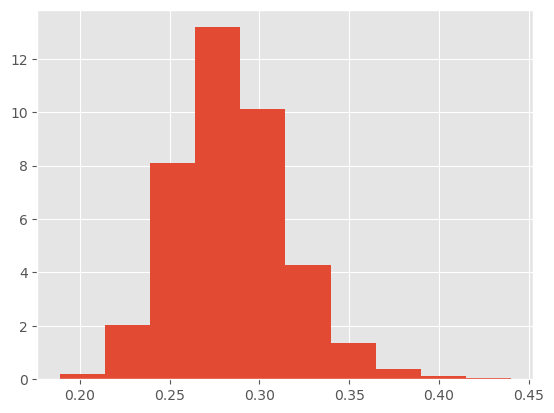

In [30]:
list(batting.playerID.unique())

plt.hist([c['BA']],stacked=True, density=True)
